In [43]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

data1=pd.read_csv(r"C:\Users\KRISH DIDWANIA\Documents\fashion-mnist_train.csv")
data2=pd.read_csv(r"C:\Users\KRISH DIDWANIA\Documents\fashion-mnist_test.csv")

data1.T
data2.T

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
label,0,1,2,2,3,2,8,6,5,0,...,7,9,4,8,0,0,6,8,8,1
pixel1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
pixel2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
pixel3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,0
pixel4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
pixel780,0,0,53,224,0,0,0,1,0,0,...,0,0,0,0,1,0,23,222,1,0
pixel781,0,0,31,222,0,0,0,0,0,0,...,0,0,0,0,0,1,28,42,0,0
pixel782,0,0,0,56,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
pixel783,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [44]:
y_train= data1['label']
x_train = data1.drop('label', axis=1)
y_test= data2['label']
x_test = data2.drop('label', axis=1)

x_test=np.array(x_test)
y_train=np.array(y_train)
y_test=np.array(y_test)
x_train=np.array(x_train)

In [45]:
print("Feature Values: \nFrom " + str(np.min(x_train)) + " to " + str(np.max(x_train)))
print("Data type: " + str(x_train.dtype))
print("\nLabel Values: ")
print(set(list(y_train)))
print("Data type: " + str(y_train.dtype))

Feature Values: 
From 0 to 255
Data type: int64

Label Values: 
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
Data type: int64


In [46]:
y_train= data1['label'].values.reshape(-1, 1)
x_train = data1.drop('label', axis=1).values / 255.0

y_test= data2['label'].values.reshape(-1, 1)
x_test = data2.drop('label', axis=1).values / 255.0

In [47]:
m,n=x_train.shape
m,n

(60000, 784)

In [48]:

y_train.shape

(60000, 1)

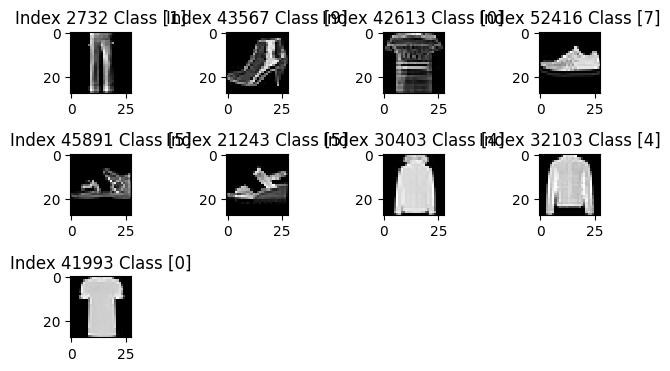

In [49]:
# random check with nine training examples
np.random.seed(0);
indices = list(np.random.randint(m,size=9))
for i in range(9):
    plt.subplot(4,4,i+1)
    plt.imshow(x_train[indices[i]].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Index {} Class {}".format(indices[i], y_train[indices[i]]))
    plt.tight_layout()


In [53]:

enc = OneHotEncoder()

def softmax(x):
    exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)

def cross_entropy_loss(y,y1):
    return -np.sum(y*np.log(y1))/m




def reLU(Z):
    return np.maximum(Z,0)
def ReLu_derivative(Z):
    return Z > 0

def predictions(h2):
    return np.argmax(h2, 0)

def accuracy(predictions, Y):
    print(predictions,Y)
    return np.sum(predictions == Y)/Y.size


n_hidden_node = 10
n_output_node = 9
learning_rate = 0.05

# initilize with random numbers for weight and bias matrix

w1 = np.random.randn(784, n_hidden_node)
b1 = np.zeros((1, n_hidden_node))
w2 = np.random.randn(n_hidden_node, n_output_node)
b2 = np.zeros((1, n_output_node))

learning_rate = 0.01
num_epochs = 10


for i in range(num_epochs):
    
    z1 = np.dot(x_train, w1) + b1
    h1 = reLU(z1)
    z2 = np.dot(h1, w2) + b2
    h2 = softmax(z2)
    
    y_train= pd.DataFrame(enc.fit_transform(data1['label'].values.reshape(-1,1)).toarray())
    loss=cross_entropy_loss(h2[1],y_train)
    
    
       # backward propagation
    
    dz2 = h2 - y_train
    dw2 = (1 / m * dz2.T.dot(h1)).T
    db2 = 1 / m * np.sum(dz2)
    dz1 = ((w2).dot(dz2.T)).T * ReLu_derivative(z1)
    dw1 = (1 / m * dz1.T.dot(x_train)).T
    db1 = 1 / m * np.sum(dz1)
    
       # adjust weights by gradient descent
    w1 = w1 - learning_rate*dw1
    b1 = b1 - learning_rate*db1
    w2 = w2 - learning_rate*dw2
    b2 = b2 - learning_rate*db2
    print(h2)
    print(f'loss={loss:.4f}')


AttributeError: module 'numpy' has no attribute 'h2'

In [ ]:
    
    z1 = np.dot(x_test, w1) + b1
    h1 = reLU(z1)
    z2 = np.dot(h1, w2) + b2
    h2 = softmax(z2)
    prediction(h2)
    print(h2)